## Step 1: Read in Data

In [1]:
# Loading Packages
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta

from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.distance import distance

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures


from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import pickle
from utils import *

%load_ext autoreload
%autoreload 2

sns.set(style='white', context='notebook', palette='deep')
plt.style.use('ggplot')
pd.set_option('display.max_columns', 360)

In [2]:
train = pd.read_csv('kc_house_data_train.csv')

In [3]:
# Save the 'Id' column
train_ID = train['id']

# lets seperate Target variable 
target = train['price']

# Drop the 'Id' column since it's unnecessary for the prediction process.
train.drop(['id','Unnamed: 0', 'price'], axis = 1, inplace = True)


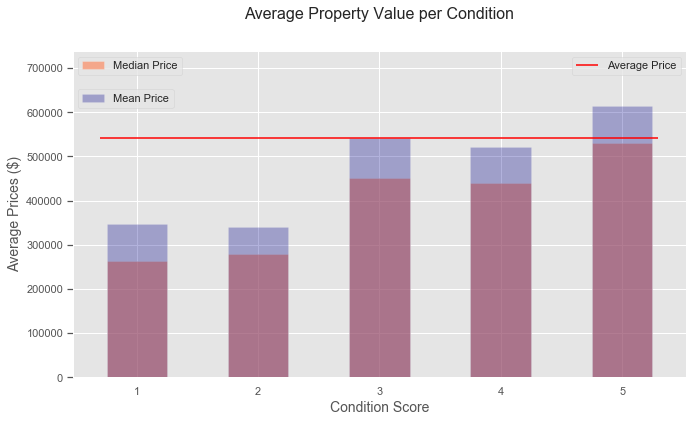

In [3]:
mean = train.groupby("condition")["price"].mean()
median = train.groupby("condition")["price"].median()
mean_data = train.price.mean()
score = np.arange(1,6)
fig, ax = plt.subplots(figsize=(11,6))
ax2 = ax.twinx() #set ax2 on same x axis as ax
ax3 = ax.twinx() #same as above, for hline
width = 0.5
ax.bar(x=score, height=median, width=width,
       label="Median Price", color="coral", alpha=0.6)
ax2.bar(x=score, height=mean, width=width,
        label="Mean Price", color="darkblue", alpha=0.3)
ax3.hlines(mean_data, .7 ,5.3, colors="red", label="Average Price")
ax.set_ylim(0,1.2*mean.max())
ax2.set_ylim(0,1.2*mean.max())
ax3.set_ylim(0,1.2*mean.max())
ax2.yaxis.set_visible(False) #hide the 2nd axis
ax3.yaxis.set_visible(False)
ax.legend(bbox_to_anchor=(0,0,1,1), loc="upper left")
ax2.legend(bbox_to_anchor=(0,-.1,1,1), loc="upper left")
ax3.legend(bbox_to_anchor=(0,0,1,1), loc="upper right")
ax.set_ylabel("Average Prices ($)", size=14)
ax.set_xlabel("Condition Score", size=14)
plt.title("Average Property Value per Condition", size=16, y=1.08)
plt.legend()
plt.savefig('cond_score.png')
plt.show();


In [6]:
dist_dntwn = train.groupby('dist_dntwn')['price'].mean()
#dist_dntwn = pd.DataFrame(dist_dntwn, index=dist_dntwn.index)

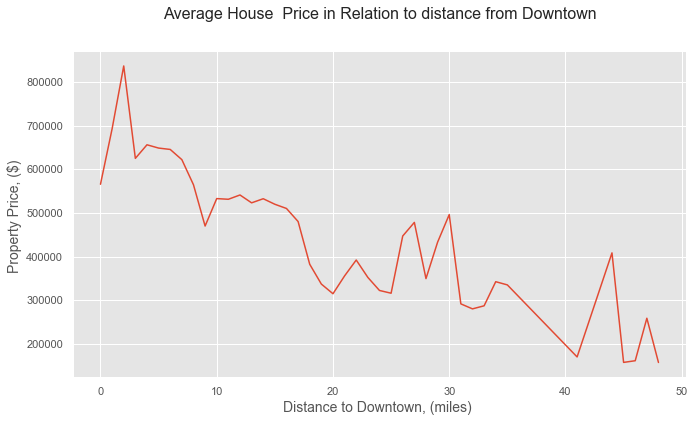

In [7]:
# Plot Histogram and boxplot
fig = plt.figure(figsize=(11,6))

sns.lineplot(x = dist_dntwn.index, y =dist_dntwn.values)
plt.ylabel("Property Price, ($) ", size=14)
plt.xlabel("Distance to Downtown, (miles) ", size=14)
plt.title("Average House  Price in Relation to distance from Downtown", size=16, y=1.08)
plt.savefig('dist_dntwn.png')
plt.show()


In [ ]:
#--------------------------Property Feature Calculation---------------------------------------#
basement = train[(train["sqft_basement"] > 0)]
basement_mean = basement.price.mean()
no_basement = train[(train["sqft_basement"] == 0)]
no_basement_mean = no_basement.price.mean()

#mean values to plot
renovated = train[(train["yr_renovated"] > 0)]
renovated_mean = renovated.price.mean()
not_renovated = train[(train["yr_renovated"] == 0)]
not_renovated_mean = not_renovated.price.mean()

#prepare plot labels
label_basement = ["Basement", "No basement"]
values_basement = [basement_mean, no_basement_mean]
label_renovation = ["Renovated", "No Renovation"]
values_renovation = [renovated_mean, not_renovated_mean]

#--------------------------Bar Plots--------------------------------------#
fig, ax = plt.subplots(1, 2, figsize=(15,6))

sns.barplot(ax=ax[0], x=label_basement, y=values_basement, palette="coolwarm")
sns.barplot(ax=ax[1], x=label_renovation, y=values_renovation, palette="coolwarm")

train_mean_price = train.price.mean()

ax[0].hlines(train_mean_price, -.5 ,1.5, colors="green", label="Average Price") #plot average price horizontal line
ax[1].hlines(train_mean_price, -.5 ,1.5, colors="red", label="Average Price") #plot average price horizontal line

#prettify graph
ax[0].set_ylabel("Average Prices ($)", size=12)
ax[0].set_title("Average Property Value", size=14)
ax[0].set_ylim(0,1.1*renovated_mean)
ax[0].legend()

ax[1].set_ylabel("Average Prices ($)", size=12)
ax[1].set_title("Average Property Value", size=14, )
ax[1].set_ylim(0,1.1*renovated_mean)
ax[1].legend()

plt.suptitle("Affect of Basement and Renovation on Property Value", size=16, y=1.5)

#uncomment below to export image
# plt.savefig("images/basement_renovation_value.png",bbox_inches = "tight")
plt.savefig('basement_renov.png')
plt.show();


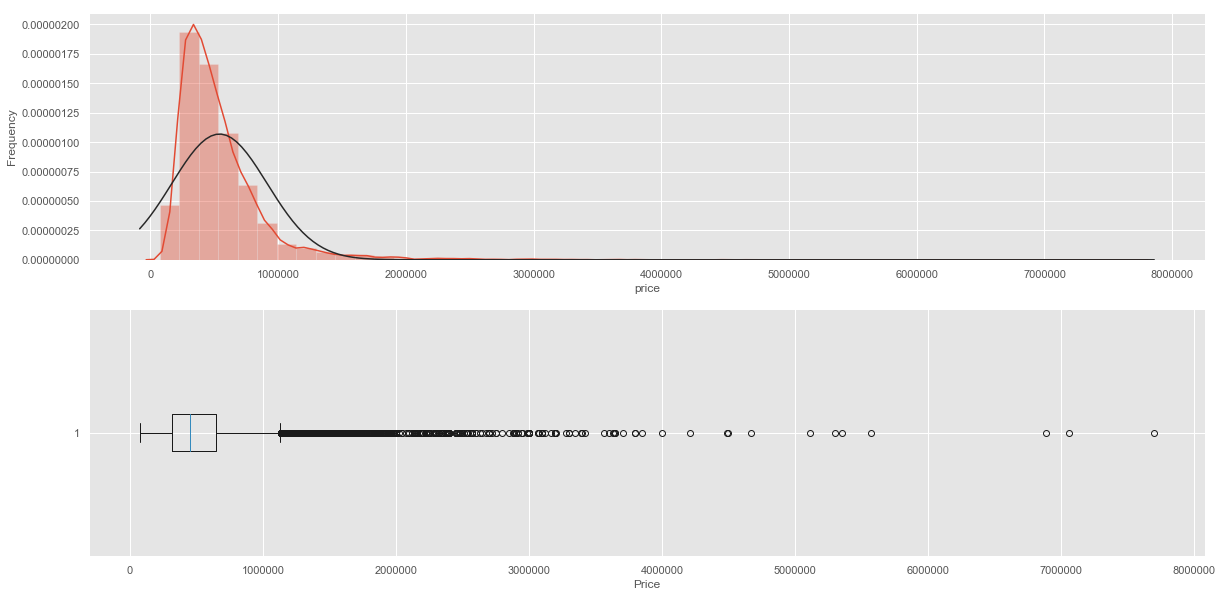

In [291]:
# Plot Histogram and boxplot
fig = plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.ylabel('Frequency')
sns.distplot(target, fit = norm)
plt.subplot(2,1,2)
plt.boxplot(target, vert = False)
plt.xlabel('Price')
plt.show()

# Additionally create data visualizations to determine if there are any relationships between your features and your target variables.
# Features Selection

In [292]:
# Lets create Correlation Matrix Heatmap with function features_corr_matrix(df)
# Find index of feature columns with correlation greater than 0.90

In [293]:
# f = train.columns[~(train.columns == 'price')]

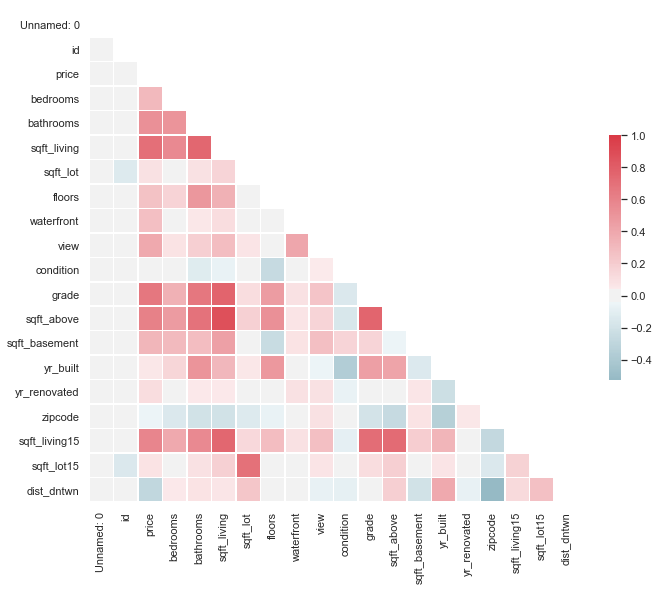

Based on threshold 0.7 , sugested featrures to drop - ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15']


In [103]:
features_corr_matrix(train, 0.7)

## Based on corr test we can exclude ['sqft_above', 'sqft_living15', 'sqft_lot15']

In [295]:
train[['sqft_living','sqft_above', 'sqft_living15', 'sqft_lot15']].corr()

,sqft_living,sqft_above,sqft_living15,sqft_lot15
sqft_living,1.000000,0.876696,0.755066,0.179570
sqft_above,0.876696,1.000000,0.731077,0.193874
sqft_living15,0.755066,0.731077,1.000000,0.178533
sqft_lot15,0.179570,0.193874,0.178533,1.000000


In [296]:
train.drop(columns = ['sqft_above', 'sqft_living15', 'sqft_lot15'], inplace=True)

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

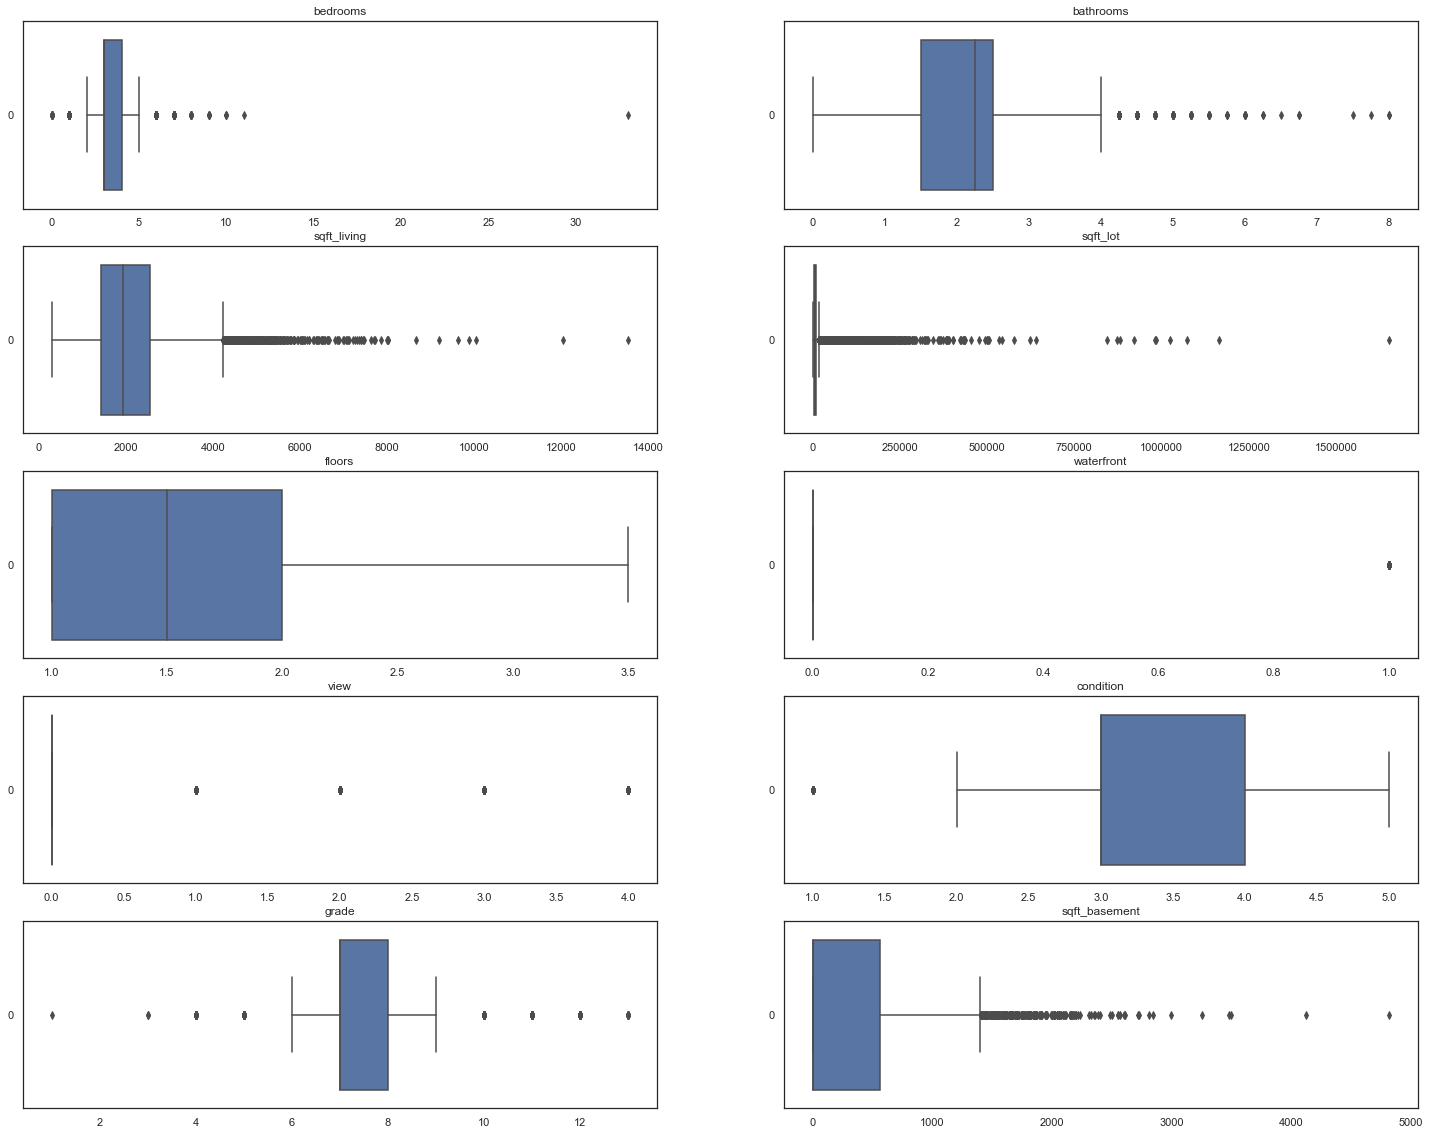

In [297]:
# Lets take a look at our independent variables
box_plots(train[[ 'bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement']])

In [298]:
# As we can see variables as 'conditions', 'waterfront', 'view', 'grade' can be treated as CATEGORICAL VARIABLES

In [299]:
categorical_variables = ['condition', 'view', 'floors', 'grade',  'waterfront', 'zipcode']
contin_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement']

In [300]:
# Lets Explore more our variable with continious values and clean up them: 

<Figure size 1800x1440 with 0 Axes>

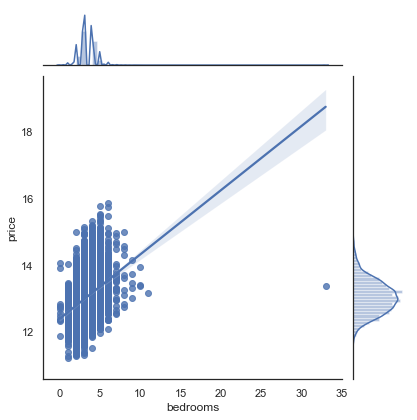

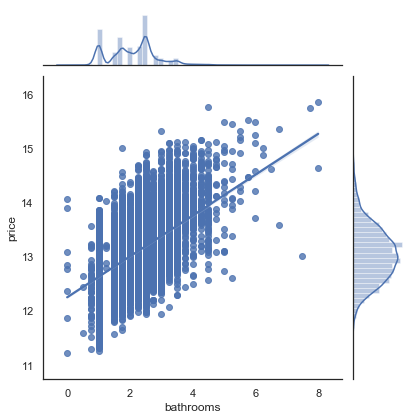

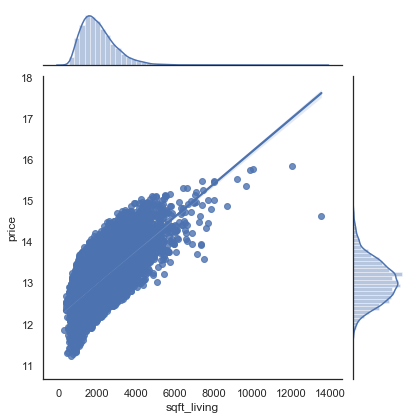

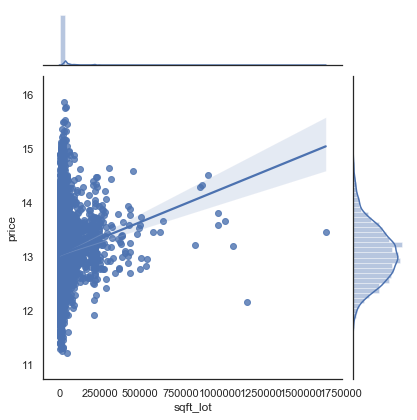

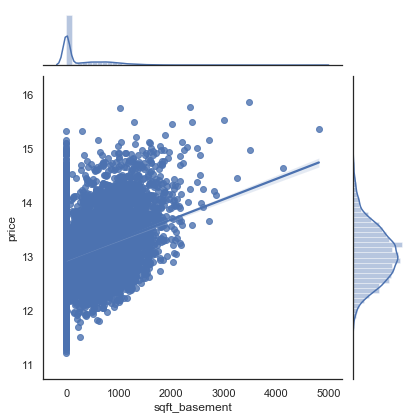

In [301]:
relationship(train[contin_variables], np.log(target))

# There is 0 values in bedrooms and bathrooms ! Also outliers in bedrooms Lets clean up this problem with function map_bad_bath

In [302]:
train = train.apply(map_bed_bath, axis = 1)

<Figure size 1800x1440 with 0 Axes>

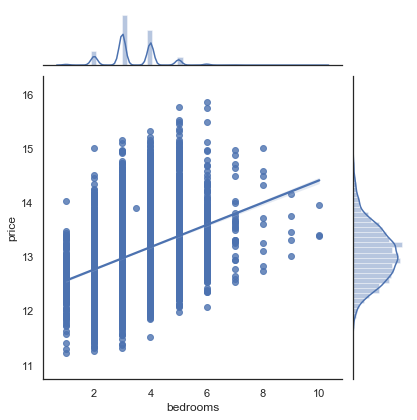

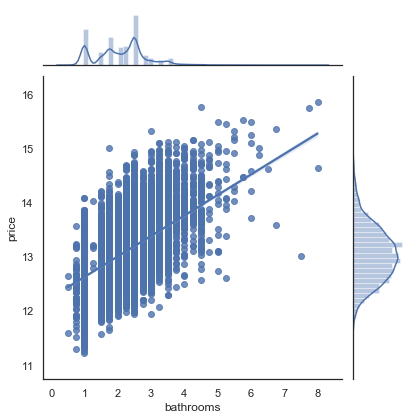

In [303]:
relationship(train[['bedrooms','bathrooms']], np.log(target))

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [304]:
# Lets Create new feature - distance from the house to downtown by using function distance_to_dwntwn in miles

In [5]:
train['dist_dntwn'] = train.apply(distance_to_dwntwn, axis = 1)  
train = train.drop(columns = ['lat','long'])

<Figure size 1800x1440 with 0 Axes>

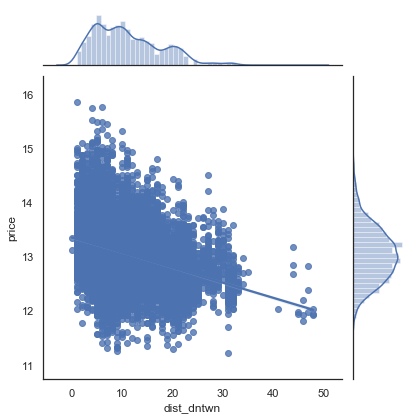

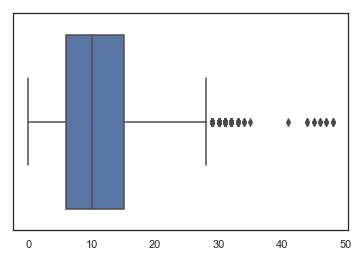

In [306]:
relationship(train[['dist_dntwn']], np.log(target))
sns.boxplot(train[['dist_dntwn']], orient='h', color = 'b')

In [307]:
features1 = [x for x in train.columns if x not in ['date']]

In [308]:
# Lets check how our model perform now based on modified F:
train_test_valid(train[features1], target)

Training: RMSE 198331 vs. Testing: RMSE 196830
Perfomance : 1 %


### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [309]:
categorical_variables

['condition', 'view', 'floors', 'grade', 'waterfront', 'zipcode']

In [310]:
# Lets create catigorical data for variable sqft_basement as its is present or not in the house
train['basement'] = train['sqft_basement'].map(lambda x : 1 if x != 0 else 0)

# Lets Add it to our list of categorical variables
categorical_variables = categorical_variables+['basement']

# converting categoricav variables to dummies with function to_dummies. 
train = to_dummies(train,categorical_variables)

In [311]:
features2 = [x for x in train.columns if x not in ['date']]

In [312]:
# Lets check how our model perform now based on modified F:
train_test_valid(train[features2], target)

Training: RMSE 152105 vs. Testing: RMSE 145793
Perfomance : 4 %


## RMSE went little bit down from 196171 to 149778.

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [313]:
# transforming date when house was sold to daytime format
#train['date'] = train['date'].map(lambda x: datetime.datetime.strptime(x,'%Y%m%dT%H%M%S'))

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [314]:
#train['yr_built'] = pd.to_datetime(train['yr_built'], format='%Y')
#train['years_old'] = train['yr_built'].map(lambda x : relativedelta(datetime.datetime.now(), x).years)

In [315]:
train['years_old'] = train['yr_built'].map(lambda x : 2021-x)
train['abs_years_old'] = train['years_old'].map(lambda x: abs(x-round(train['years_old'].mean())))

# Lets convert our 'yr_renovated' column into datetime format with function format_yr_renov(row)
# and apply this function to our train dataset

train = train.apply(format_yr_renov, axis=1)
train['yrs_from_renov'] = train['yr_renovated'].map(lambda x : relativedelta(datetime.datetime.now(), x).years)

In [316]:
features3 = [x for x in train.columns if x not in ['date','yr_built','yr_renovated']]

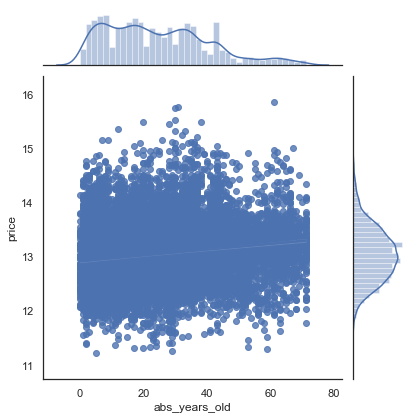

In [317]:
sns.jointplot(x=train['abs_years_old'], y = np.log(target), kind='reg')

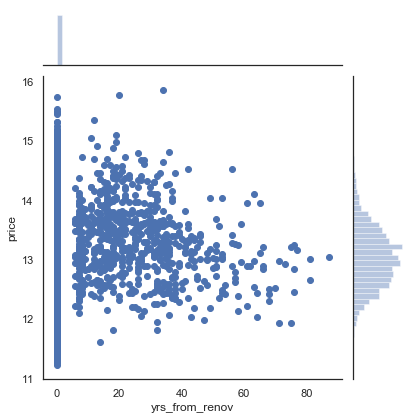

In [318]:
sns.jointplot(x=train['yrs_from_renov'], y = np.log(target))

In [319]:
# Lets chech if RMSE CHANGED
train_test_valid(train[features3], target)

Training: RMSE 152336 vs. Testing: RMSE 145867
Perfomance : 4 %


In [320]:
## RMSE didnt changed then we can drop this columns

In [321]:
train = train.drop(columns=['date','yr_built','yr_renovated'])

In [322]:
# school_rate = pd.read_csv('Niche.csv')[['zipcode','school_grade']]
# train1 = school_rate.set_index('zipcode').join(train.set_index('zipcode'), how = 'right').reset_index()

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

# Lets create poly features degrtee 2  for nonedummies features

In [323]:
fts_for_poly = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement', 'dist_dntwn', 'years_old', 'yrs_from_renov', 'abs_years_old']
df_poly2 = create_poly_df(train[fts_for_poly], 2)
not_poly_fts = [x for x in train.columns if x not in fts_for_poly]
train_poly2 = pd.merge(df_poly2, train[not_poly_fts], left_index=True, right_index=True)
train_test_valid(train_poly2, target)

Training: RMSE 133434 vs. Testing: RMSE 127371
Perfomance : 5 %


## Lets create poly features degrtee 3 for nonedummies features

In [324]:
df_poly3 = create_poly_df(train[fts_for_poly], 3)
not_poly_fts = [x for x in train.columns if x not in fts_for_poly]
train_poly3 = pd.merge(df_poly3, train[not_poly_fts], left_index=True, right_index=True)
train_test_valid(train_poly3, target)

Training: RMSE 183497 vs. Testing: RMSE 194217
Perfomance : 6 %


## Poly 4th Degree

In [332]:
df_poly4 = create_poly_df(train[fts_for_poly], 4)
not_poly_fts = [x for x in train.columns if x not in fts_for_poly]
train_poly4 = pd.merge(df_poly4, train[not_poly_fts], left_index=True, right_index=True)
train_test_valid(train_poly4, target)

Training: RMSE 188479 vs. Testing: RMSE 1561972
Perfomance : 729 %


In [342]:
len(train_poly2.columns)

149

## As we can see RMSE on Training set at poly_3 degree went signif. up and We overfiting model alot

In [325]:
# Lets Stay with the model of poly features degree 2

Training: RMSE 133447 vs. Testing: RMSE 127456
Perfomance : 4 %


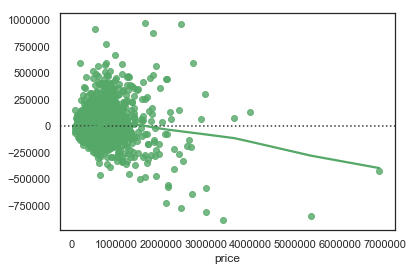

In [328]:
# Plot the residuals after fittin a linear model with POLY FEATURES DEGREE 2

scale_transform_validate(train_poly2, target, residuals= True)

Training: RMSE 122616 vs. Testing: RMSE 134256
Perfomance : 9 %


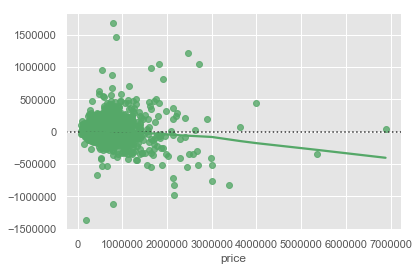

In [268]:
# Plot the residuals after fittin a linear model with POLY FEATURES DEGREE 3

scale_transform_validate(train_poly3, target, residuals=True)

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

In [45]:
# F Test Future Selection

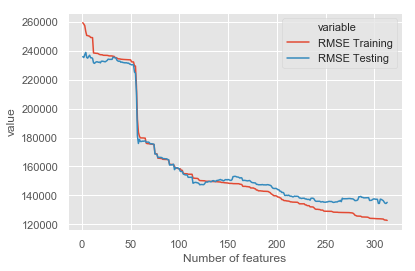

In [267]:
# Lets run feature selection function for our poly featers degree 3
# And see perfomance of RMSE based on number of features

f_test_select_vis(train_poly3, target)

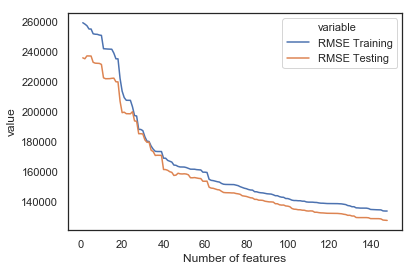

In [329]:
# Lets run feature selection function for our poly featers degree 3
# And see perfomance of RMSE based on number of features

f_test_select_vis(train_poly2, target)

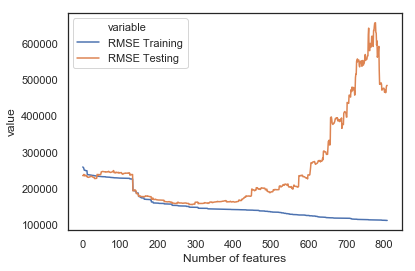

In [333]:
# Lets run feature selection function for our poly featers degree 4
# And see perfomance of RMSE based on number of features

f_test_select_vis(train_poly4, target)

In [209]:
# As we can see All features in training set are importent in order to achive the lowest RMSE
# with best perfomance involving Training and testing 

In [336]:
scale_fit_pickle_origin(train_poly2, target)

 CONGATS !!! You sucessfuly created you pickles for SCALER and MODEL
